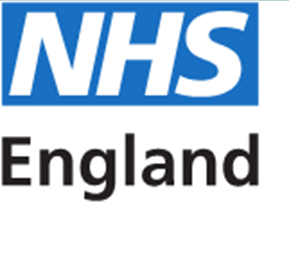


### APPLICANT NAME : OKWUAZU IFEAKACHUKWU


## Part 1: Coding Exercise 

In [1]:
# importing libraries and dependencies 
import os
import warnings
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 22)

## 1. Analysis for a single month  sep 2021

In [2]:
sep_2021 =pd.read_csv('C:\\Users\\Okwua\\nhs\\data12.csv' )

In [3]:
sep_2021.head(2)

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-SEPTEMBER-2021,RBQ,NHS ENGLAND NORTH WEST,LIVERPOOL HEART AND CHEST HOSPITAL NHS FOUNDAT...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207
1,MSitAE-SEPTEMBER-2021,Y02615,NHS ENGLAND MIDLANDS,SOUTH BIRMINGHAM GP WALK IN CENTRE,0,0,6517,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standard inspection 


In [4]:
print('The dimension of the {} is {}'.format('dataset', sep_2021.shape)) 

print('The sum of null values in the {} is {}'.format('dataset', sep_2021.isnull().sum().sum())) 

print('The sum of duplicate rows in the {} is {}'.format('dataset', sep_2021.duplicated().sum()))

The dimension of the dataset is (207, 22)
The sum of null values in the dataset is 0
The sum of duplicate rows in the dataset is 0


### 1.1 Initial specific question 

In [5]:
# 1.1.1 What are the names of the regions that are represented in the data? Regions are listed under "Parent Org" column.

sep_2021['Parent Org'].unique().tolist()

['NHS ENGLAND NORTH WEST ',
 'NHS ENGLAND MIDLANDS ',
 'NHS ENGLAND SOUTH EAST ',
 'NHS ENGLAND LONDON',
 'NHS ENGLAND SOUTH WEST ',
 'NHS ENGLAND NORTH EAST AND YORKSHIRE ',
 'NHS ENGLAND EAST OF ENGLAND ']

In [6]:
# 1.1.2 Generate a subset of the data by only including rows whose ‘Org Code’ is three digits long, e.g. RBQ. 
sub_sep21=sep_2021.rename(columns = {'Org Code' : 'Org_Code'}, inplace = True)
sub_sep21=sep_2021[sep_2021.Org_Code.apply(len)==3]

sub_sep21.head()

,Period,Org_Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-SEPTEMBER-2021,RBQ,NHS ENGLAND NORTH WEST,LIVERPOOL HEART AND CHEST HOSPITAL NHS FOUNDAT...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207
4,MSitAE-SEPTEMBER-2021,NL7,NHS ENGLAND MIDLANDS,ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM),0,0,3271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,MSitAE-SEPTEMBER-2021,RJN,NHS ENGLAND NORTH WEST,EAST CHESHIRE NHS TRUST,4377,0,0,57,0,19,1930,0,0,0,0,0,207,11,958,0,0,164
10,MSitAE-SEPTEMBER-2021,AXG,NHS ENGLAND SOUTH WEST,WILTSHIRE HEALTH & CARE,0,0,870,0,0,608,0,0,5,0,0,1,0,0,0,0,0,0
11,MSitAE-SEPTEMBER-2021,NDJ,NHS ENGLAND SOUTH EAST,FIRST COMMUNITY HEALTH AND CARE CIC,0,0,1627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#1.1.3 the names listed under "Org name" column correspond to trust names. What is the median number of trusts per region? 

sub_sep21.groupby('Parent Org')['Org name'].count()

Parent Org
NHS ENGLAND EAST OF ENGLAND              14
NHS ENGLAND LONDON                       23
NHS ENGLAND MIDLANDS                     29
NHS ENGLAND NORTH EAST AND YORKSHIRE     25
NHS ENGLAND NORTH WEST                   27
NHS ENGLAND SOUTH EAST                   24
NHS ENGLAND SOUTH WEST                   22
Name: Org name, dtype: int64

In [8]:
# 1.1.4 Based on the attendance columns, determine how many trusts have type 1 departments.
col=sub_sep21['A&E attendances Type 1']
result=np.count_nonzero(col, axis=0).sum()
result

126

In [9]:
# 1.1.5 Based on the attendance columns, determine how many trusts have both type 1 and type 2 departments.

cols=sub_sep21[['A&E attendances Type 1','A&E attendances Type 2']]
result=np.count_nonzero(cols, axis=0).sum()
result

157

In [10]:
# 1.1.6 There are emergency admissions via four different routes. Compute the total emergency admissions per trust.
total_emergencies = sub_sep21["Emergency admissions via A&E - Type 1"] + sub_sep21["Emergency admissions via A&E - Type 2"]+ sub_sep21["Emergency admissions via A&E - Other A&E department"]+ sub_sep21["Other emergency admissions"]
sub_sep21["total_emergency_admissions"] = total_emergencies

totem_per_trust = sub_sep21[["Org name", "total_emergency_admissions"]]
totem_per_trust.head()

,Org name,total_emergency_admissions
0,LIVERPOOL HEART AND CHEST HOSPITAL NHS FOUNDAT...,207
4,ASSURA VERTIS URGENT CARE CENTRES (BIRMINGHAM),0
6,EAST CHESHIRE NHS TRUST,1122
10,WILTSHIRE HEALTH & CARE,0
11,FIRST COMMUNITY HEALTH AND CARE CIC,0


In [11]:
# 1.1.7 Out of the trusts with both type 1 and type 2 departments, determine the trusts (and their corresponding regions) 
# where less than 1% of the admitted patients waited 12+ hrs from decision to admit (DTA) to admission.

sub_data= sub_sep21[(sub_sep21['A&E attendances Type 1']>0) & (sub_sep21['A&E attendances Type 2']>0)]

sub_data=pd.DataFrame(sub_data.groupby(['Parent Org','Org name'])['Patients who have waited 12+ hrs from DTA to admission'].sum())

sub_data= sub_data.reset_index()
threshold=sub_data['Patients who have waited 12+ hrs from DTA to admission'].sum()*0.01


df_mask=sub_data['Patients who have waited 12+ hrs from DTA to admission']<threshold
filtered_df = sub_data[df_mask]
filtered_df.iloc[:, 0:2] 

,Parent Org,Org name
3,NHS ENGLAND LONDON,GUY'S AND ST THOMAS' NHS FOUNDATION TRUST
4,NHS ENGLAND LONDON,IMPERIAL COLLEGE HEALTHCARE NHS TRUST
6,NHS ENGLAND MIDLANDS,NORTHAMPTON GENERAL HOSPITAL NHS TRUST
8,NHS ENGLAND MIDLANDS,SANDWELL AND WEST BIRMINGHAM HOSPITALS NHS TRUST
9,NHS ENGLAND MIDLANDS,UNIVERSITY HOSPITALS COVENTRY AND WARWICKSHIRE...
12,NHS ENGLAND NORTH EAST AND YORKSHIRE,AIREDALE NHS FOUNDATION TRUST
13,NHS ENGLAND NORTH EAST AND YORKSHIRE,SHEFFIELD TEACHING HOSPITALS NHS FOUNDATION TRUST
14,NHS ENGLAND NORTH EAST AND YORKSHIRE,SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION T...
15,NHS ENGLAND NORTH EAST AND YORKSHIRE,THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATI...
17,NHS ENGLAND NORTH WEST,LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION ...


### 1.2 Plots to explore data

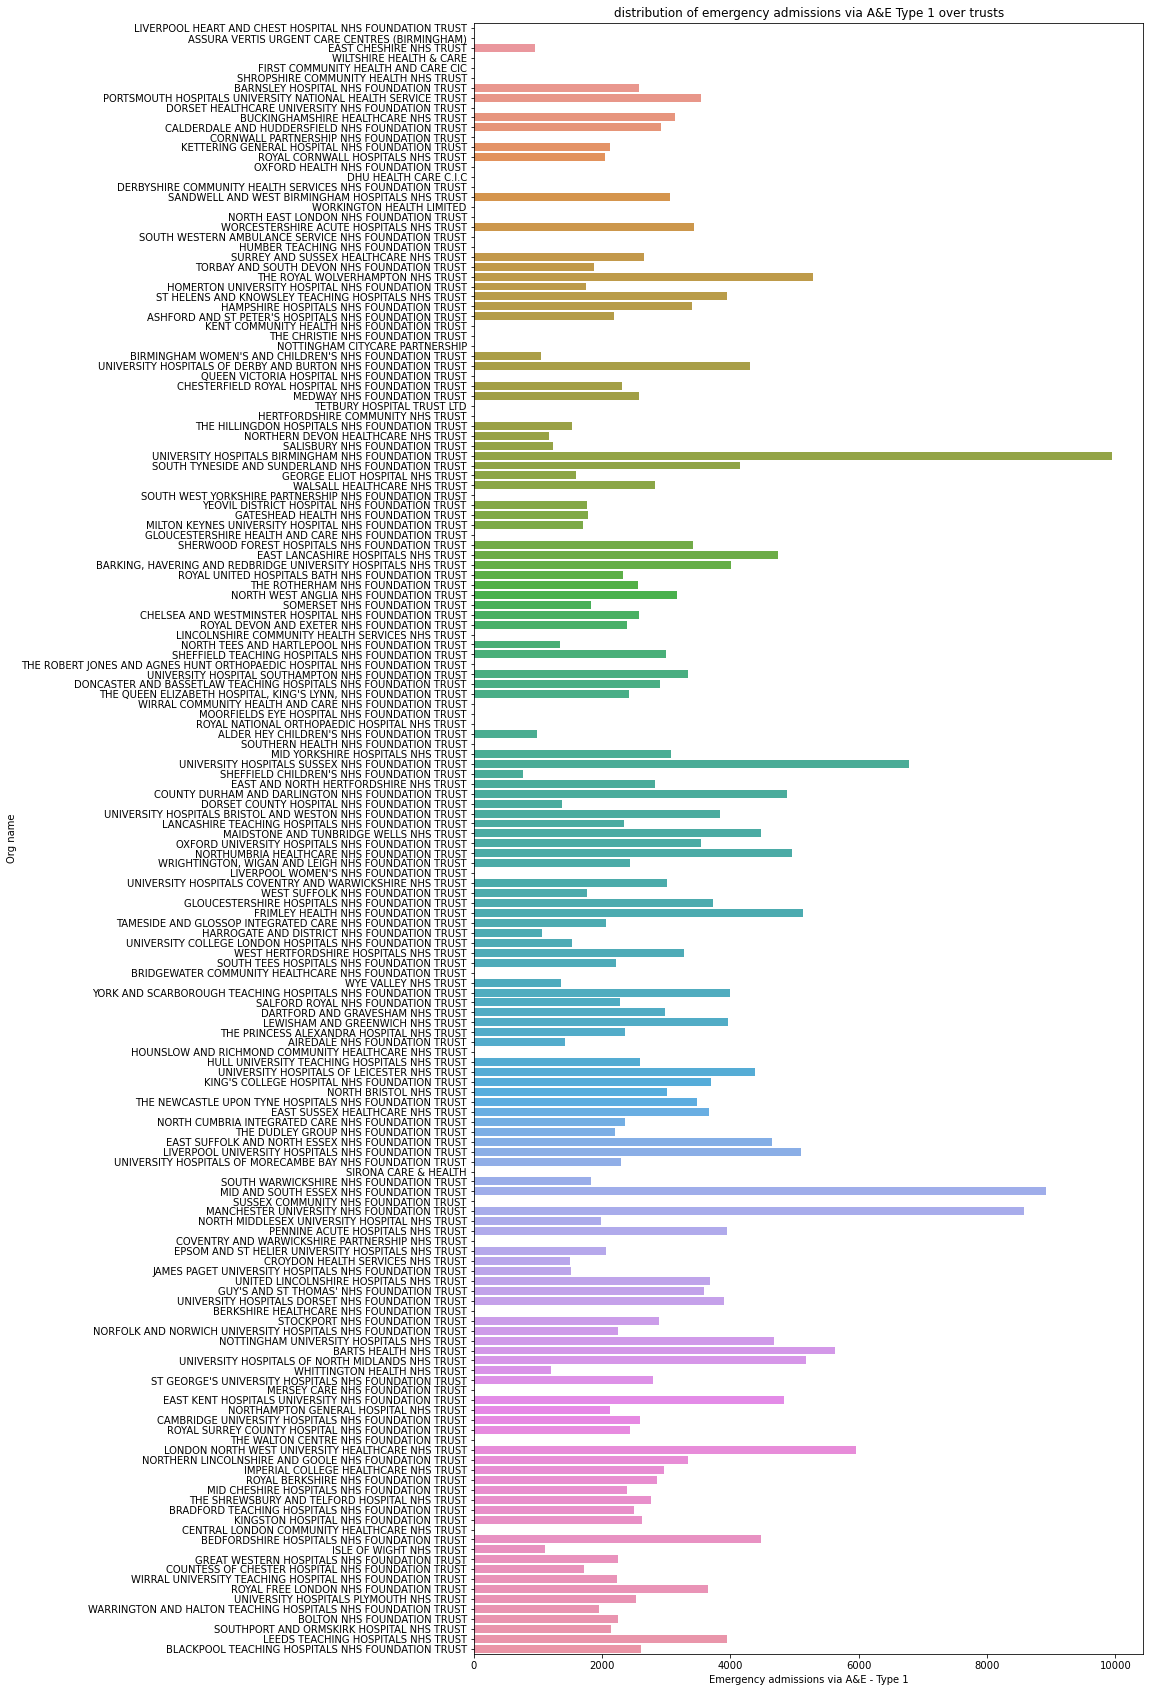

In [12]:
# 1.2.1. Plot the distribution of emergency admissions via A&E Type 1 over trusts.
plt.figure(figsize=(12,30)) #specifying figure size 
sns.barplot(x="Emergency admissions via A&E - Type 1",y="Org name",data=sub_sep21)
plt.title("distribution of emergency admissions via A&E Type 1 over trusts");


In [13]:
sub_sep21.columns = sub_sep21.columns.str.replace(' ','_')

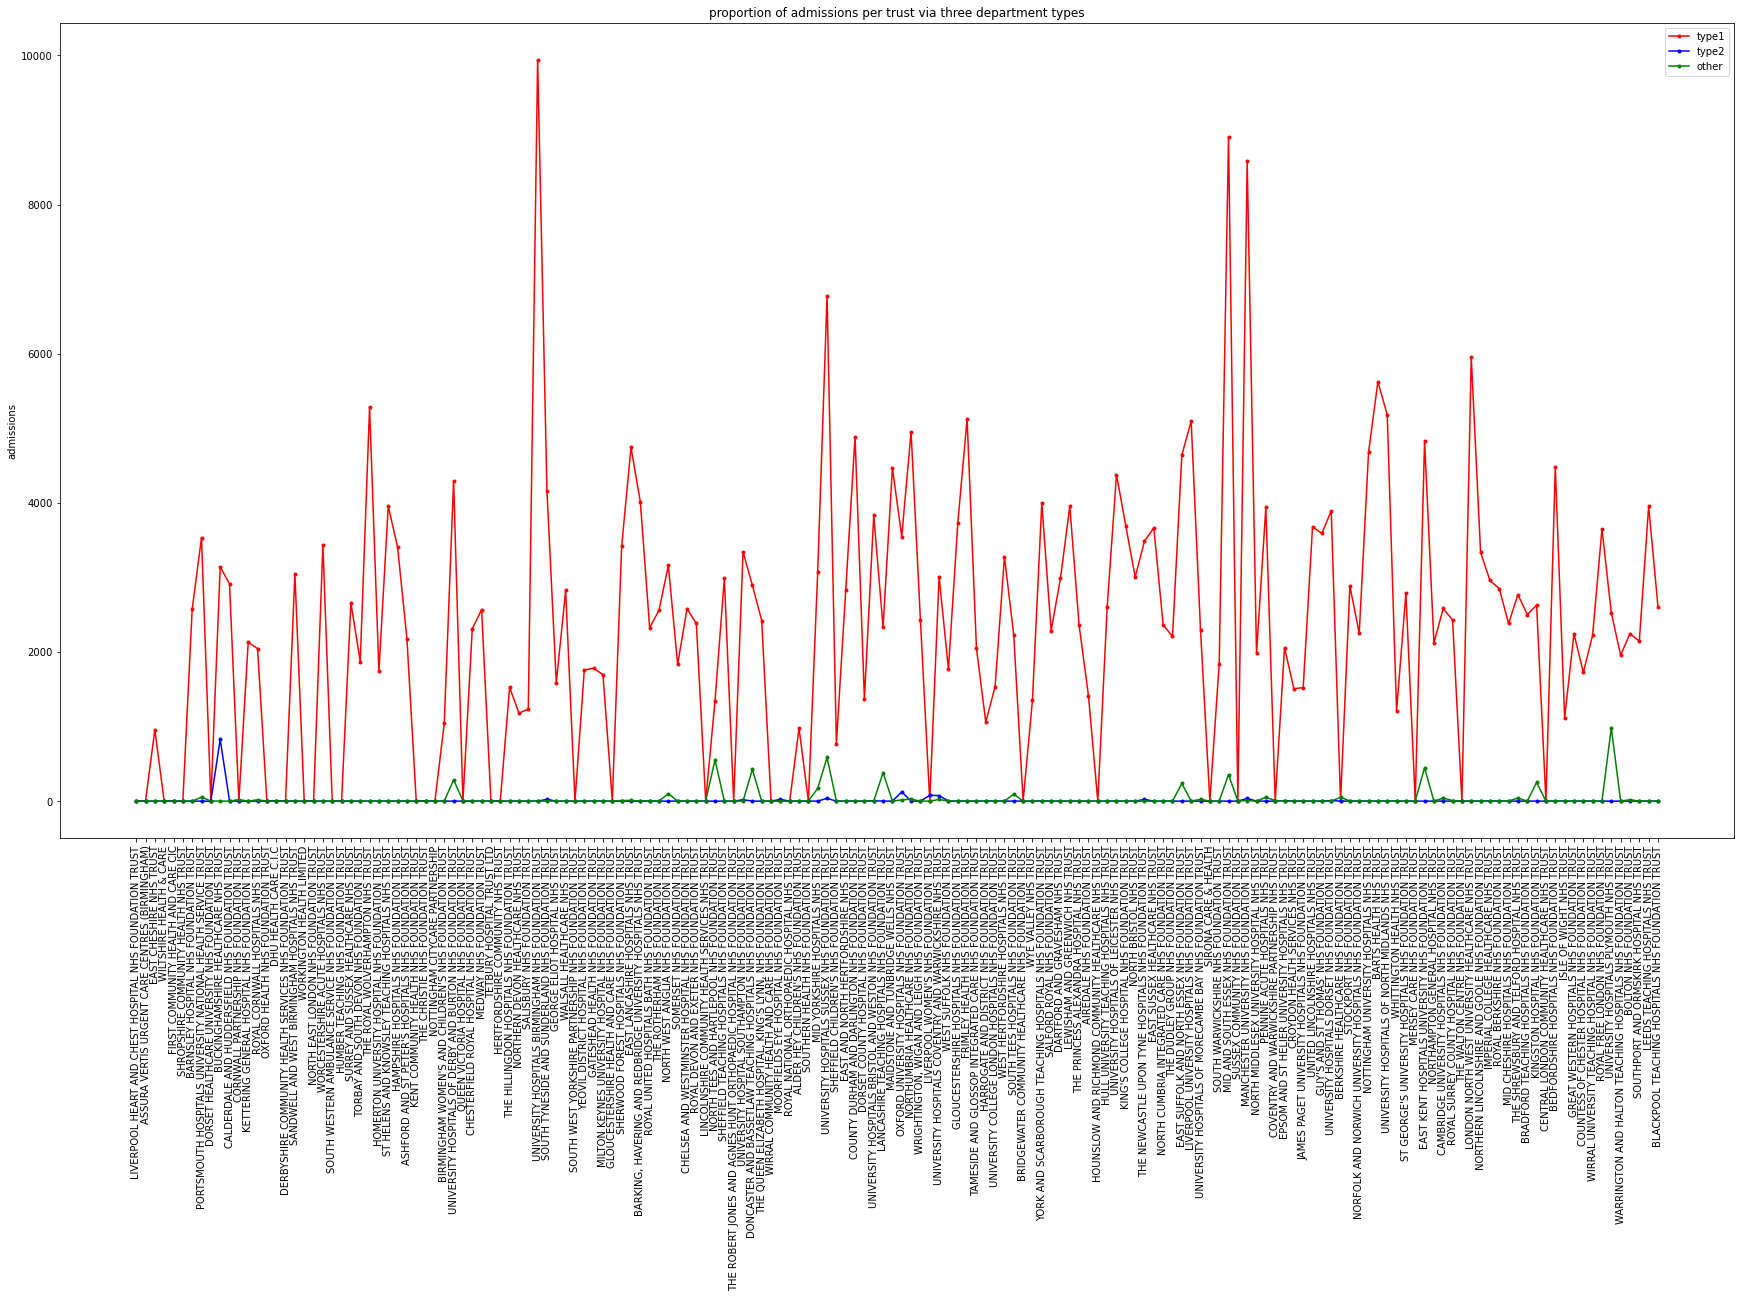

In [14]:
# 1.2.2 Not all attendances lead to admissions. Plot the proportion of admissions per trust via three department types and make any comparison based on the plots

sub_sep21.columns = sub_sep21.columns.str.replace(' ','_')
plt.figure(figsize=(30,15))

plt.plot(sub_sep21['Org_name'],sub_sep21['Emergency_admissions_via_A&E_-_Type_1'],'r.-',label='type1')
plt.plot(sub_sep21['Org_name'],sub_sep21['Emergency_admissions_via_A&E_-_Type_2'],'b.-',label='type2')
plt.plot(sub_sep21['Org_name'],sub_sep21['Emergency_admissions_via_A&E_-_Other_A&E_department'],'g.-',label='other')

plt.title('proportion of admissions per trust via three department types')
plt.ylabel('admissions')
plt.legend()

plt.xticks(sub_sep21.Org_name)
plt.xticks(rotation=90)
plt.show();

The A&E Emergency admissions via Type 1 departments shows an unstable distribution with alternating spikes and troughs in the month of september 2021, while A&E admissions via other A&E department shows a few spikes but is fairly stable across most trusts, the values of A&E Emergency admissions via Type 2 is the most stable of the tree and remains really low across the trusts. 

## 2. Analysis over a year from Oct 2020 to Sep 2021

In [15]:
# merge datasets
from glob import glob 

In [16]:
files=sorted(glob('C:\\Users\Okwua\\nhs\\data*.csv'))

master_df=pd.concat(pd.read_csv(datafile)
                   for datafile in files)

master_df.head(2)

,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-OCTOBER-2020,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,1346,0,0,143,0,0,4,0,0,0,0,0,0,0,0,0
1,MSitAE-OCTOBER-2020,RV9,NHS ENGLAND NORTH EAST AND YORKSHIRE,HUMBER TEACHING NHS FOUNDATION TRUST,0,0,365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
master_df.shape

(2552, 22)

In [18]:
#check for missing values and duplicated rows 
print(master_df.isna().sum().sum())
print(master_df.duplicated().sum())

0
0


In [19]:
## 2.1 Visualize how total emergency admissions via A&E type 1 varied over a year by region. Are there any patterns?
master_df['Period'] = master_df['Period'].str.replace('MSitAE-', '')
master_df.head()


master_df['Period'] = pd.to_datetime(master_df['Period'])


# extracting month name from numeric equivalent 
master_df['month'] = master_df['Period'].dt.month_name().str[:3]
master_df.columns = master_df.columns.str.replace(' ','_')
master_df.head()

,Period,Org_Code,Parent_Org,Org_name,A&E_attendances_Type_1,A&E_attendances_Type_2,A&E_attendances_Other_A&E_Department,A&E_attendances_Booked_Appointments_Type_1,A&E_attendances_Booked_Appointments_Type_2,A&E_attendances_Booked_Appointments_Other_Department,Attendances_over_4hrs_Type_1,...,Attendances_over_4hrs_Other_Department,Attendances_over_4hrs_Booked_Appointments_Type_1,Attendances_over_4hrs_Booked_Appointments_Type_2,Attendances_over_4hrs_Booked_Appointments_Other_Department,Patients_who_have_waited_4-12_hs_from_DTA_to_admission,Patients_who_have_waited_12+_hrs_from_DTA_to_admission,Emergency_admissions_via_A&E_-_Type_1,Emergency_admissions_via_A&E_-_Type_2,Emergency_admissions_via_A&E_-_Other_A&E_department,Other_emergency_admissions,month
0,2020-10-01,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,1346,0,0,143,0,...,4,0,0,0,0,0,0,0,0,0,Oct
1,2020-10-01,RV9,NHS ENGLAND NORTH EAST AND YORKSHIRE,HUMBER TEACHING NHS FOUNDATION TRUST,0,0,365,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,Oct
2,2020-10-01,L83087,NHS ENGLAND SOUTH WEST,OKEHAMPTON MEDICAL CENTRE,0,0,93,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,Oct
3,2020-10-01,C82009,NHS ENGLAND MIDLANDS,MARKET HARBOROUGH MED.CTR,0,0,330,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,Oct
4,2020-10-01,Y02615,NHS ENGLAND MIDLANDS,SOUTH BIRMINGHAM GP WALK IN CENTRE,0,0,5298,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,Oct


In [20]:
master_df=master_df.groupby(['Parent_Org','month'])['Emergency_admissions_via_A&E_-_Type_1'].sum()
master_df=master_df.reset_index()

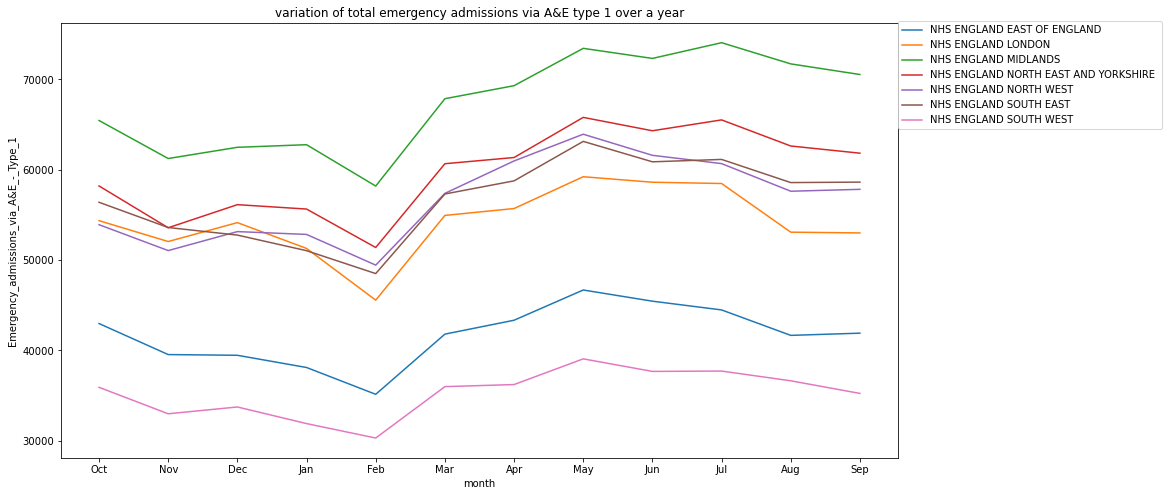

In [21]:
plt.figure(figsize=(15,8))
master_df['month'] = pd.Categorical(master_df['month'],
                                   categories=['Oct', 'Nov', 'Dec', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep'],
                                   ordered=True)

#plot
g = sns.lineplot(x='month', y='Emergency_admissions_via_A&E_-_Type_1', data=master_df, hue='Parent_Org')
plt.legend(bbox_to_anchor=(1,0.88), loc="center left", borderaxespad=0)
plt.title('variation of total emergency admissions via A&E type 1 over a year')
plt.show()

The total emergency admissions via A&E type 1 shows a similar trend across the regions, we observe an initial decrease from october to november 2020, followed by an increase until january 2021. A sudden decrease then follows peaking in the month of february across the regions, after which there is a sudden rise in the emergency admissions until August where the emergency admissions exhibits some stability even unto the month of september 2021. 

An Investigation to the reasons for this trend, especially the peak trough in february could be further investigated. A possible reason may be due to the Covid-19 response in managing patient flow through the introduction of online booking for appointments. 